## 1)載入資料集
載入信用卡盜刷資料集

In [1]:
import pandas as pd
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
X=raw_df.drop(columns = ['Class'])
y=raw_df['Class']
print('X:', X.shape)
print('Y:', y.shape)

X: (284807, 30)
Y: (284807,)


## 2) 切割訓練集與測試集

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (199364, 30)
X_test: (85443, 30)


In [3]:
# 查看訓練集的分佈
pd.Series(y_train).value_counts(normalize=True) 

0    0.998275
1    0.001725
Name: Class, dtype: float64

In [4]:
# 查看測試集的分佈
pd.Series(y_test).value_counts(normalize=True)

0    0.998268
1    0.001732
Name: Class, dtype: float64

## LightGBM
Parameters:
- num_iterations: 總共迭代的次數，即決策樹的個數。預設值為100。
- learning_rate: 學習速率，預設0.1。
- boosting: 選擇 boosting 種類。共四種 gbdt、rf、dart、goss，預設為 gbdt。
- max_depth: 樹的最大深度，預設值為-1即表示無限制。
- min_data_in_leaf: 一個子葉中最少數據，可用於處理過擬合。預設20筆。
- max_bin: 將特徵值放入桶中的最大bins數。預設為255。

Attributes:
- feature_importances_: 查詢模型特徵的重要程度。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。
- predict_proba: 預測每個類別的機率值。

In [5]:
import lightgbm as lgb
model = lgb.LGBMClassifier(is_unbalance=False)
model.fit(X_train,y_train)

LGBMClassifier(is_unbalance=False)

### 評估模型準確率

In [7]:
from sklearn.metrics import accuracy_score
pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy 0.9974368877497279


### 使用混淆矩陣分析模型

In [8]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 85295, 1: 148}

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(actual_val, pred_val, title=None):
    """
    pd.crosstab() - crosstab function builds a cross-tabulation table that can show the 
                    requency with which certain groups of data appear.
    
    """
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    if title is None:
        pass
    else:
        plot.set_title(title)
        
    plt.show()

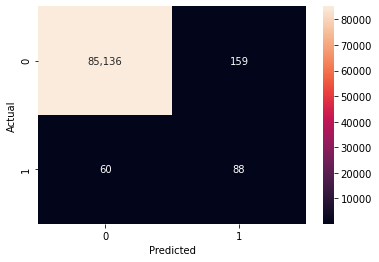

In [10]:
plot_confusion_matrix(y_test, pred)